
# Erdős-Gallai y Havel-Hakimi en Python



Ya vimos una manera de crear una sucesión aleatoria de números para
checar si forman una sucesión gráfica o no.

Estamos usando la función `randint` dentro de la biblioteca `random`
(que viene con Python, por lo que es parte de la *Python Standard
Library*). La función `random.randint(a,b)` regresa un entero
aleatorio entre los enteros `a` y `b`, incluyendo posiblemente ambos
extremos. 



In [1]:
import random

def random_sequence(n):
    seq = []
    for i in range(n):
        seq.append(random.randint(1, n-1))
    seq.sort(reverse=True)
    return seq

In [3]:
random_sequence(10)

[9, 7, 6, 5, 2, 2, 2, 2, 1, 1]


## Erdős-Gallai



El teorema de Erdős-Gallai dice que una sucesión
$(d_{1},d_{2},\ldots,d_{n})$ de enteros positivos tales que
$d_{1}\geq d_{2}\geq\cdots\geq d_{n}$ es gráfica si y solo si se
cumplen: 

1.  $\sum_{i=1}^{n}d_{i}$ es par.
2.  Para todo $k$ se tiene que:
    
    \begin{equation*}
    \sum_{i=1}^{k}d_{i}\leq k(k-1)+\sum_{i=k+1}^{n}\min\{d_{i},k\}.
    \end{equation*}

Definimos una función para verificar las condiciones anteriores en una
sucesión de enteros:



In [11]:
def erdos_gallai(seq):
    if sum(seq) % 2 == 1:
        return False
    else:
        n = len(seq)
        for k in range(1, n+1):
            minimums = list(map(lambda i: min(i, k), seq[k:]))
            # print(k, sum(seq[0:k]), k*(k-1) + sum(minimums))
            if sum(seq[0:k]) > (k*(k-1) + sum(minimums)):
                return False
        else:
            return True

In [30]:
seq = random_sequence(100)
erdos_gallai(seq)

True


## Havel-Hakimi



El teorema de Havel-Hakimi dice que una sucesión
$D=(d_{1},d_{2},\ldots,d_{n})$ como la de antes es gráfica, si y
solo si la sucesión
$D'=(d_{2}-1,d_{3}-1,\ldots,d_{d_{1}+1}-1,d_{d_{2}+2},\ldots,d_{n})$
es gráfica.

Definimos una función que crea la sucesión $D'$:



In [31]:
def d_prime(seq):
    newseq = []
    if len(seq) > 0:
        bigger = seq[0]
        if len(seq) < bigger+1:
            return [-1]
        else:
            for i in range(1, bigger+1):
                newseq.append(seq[i]-1)
            for i in range(bigger+1, len(seq)):
                newseq.append(seq[i])
        newseq.sort(reverse=True)
    return newseq

Por ejemplo:



In [32]:
d_prime([4,3,3,2,1,1]), d_prime([4,3,2,1])

([2, 2, 1, 1, 0], [-1])

Con esto, podemos dar una función recursiva que cheque recursivamente
el algoritmo.



In [33]:
def havel_hakimi(seq):
    print(seq)
    if seq == []:
        return True
    elif seq[-1] < 0:
        return False
    else:
        newseq = d_prime(seq)
        return havel_hakimi(newseq)

Por ejemplo:



In [37]:
seq=random_sequence(40)
havel_hakimi(seq)

[39, 37, 37, 37, 36, 35, 34, 34, 34, 33, 32, 31, 30, 28, 27, 27, 27, 26, 26, 20, 19, 19, 18, 17, 15, 11, 10, 8, 7, 6, 6, 5, 5, 4, 3, 2, 2, 1, 1, 1]
[36, 36, 36, 35, 34, 33, 33, 33, 32, 31, 30, 29, 27, 26, 26, 26, 25, 25, 19, 18, 18, 17, 16, 14, 10, 9, 7, 6, 5, 5, 4, 4, 3, 2, 1, 1, 0, 0, 0]
[35, 35, 34, 33, 32, 32, 32, 31, 30, 29, 28, 26, 25, 25, 25, 24, 24, 18, 17, 17, 16, 15, 13, 9, 8, 6, 5, 4, 4, 3, 3, 2, 1, 0, 0, 0, 0, -1]


False


# Networkx



`networkx` es una biblioteca (que no es parte de la biblioteca
estándar de Python) que permite trabajar con gráficas.



In [38]:
import networkx as nx
g = nx.Graph()
g.add_nodes_from([0, 1, 2, 3])
g.add_edges_from([(0, 1), (0, 2), (1, 3), (1, 2), (2, 3)])

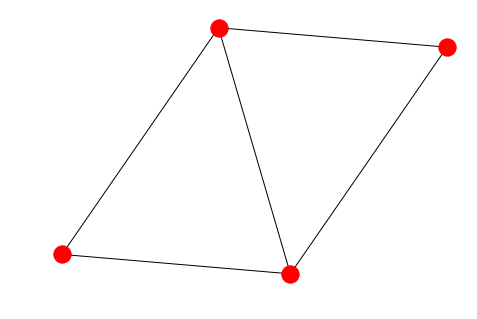

In [40]:
nx.draw(g)

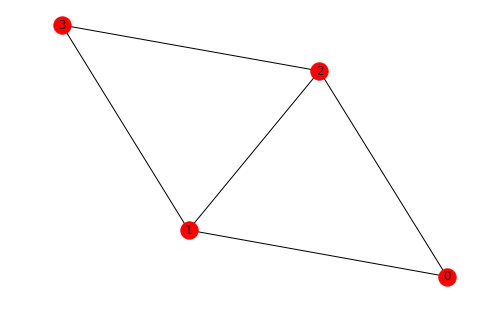

In [45]:
nx.draw(g, with_labels=True)

Hay algunas gráficas que ya están predefinidas.



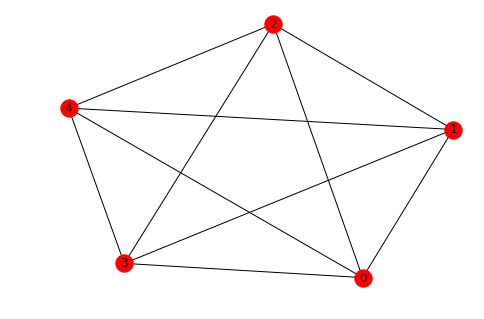

In [46]:
g=nx.complete_graph(5)
nx.draw(g, with_labels=True)

/home/rafael/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


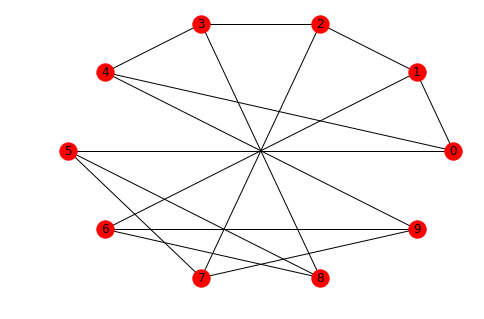

In [50]:
g=nx.petersen_graph()
nx.draw_circular(g, with_labels=True)

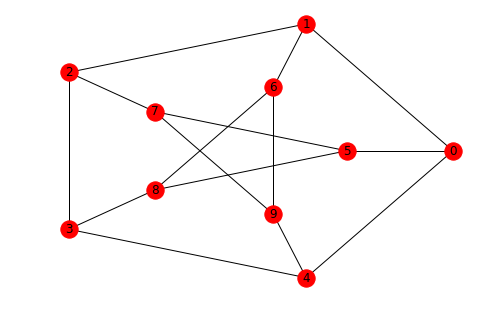

In [48]:
g=nx.petersen_graph()
nx.draw_shell(g, with_labels=True, nlist=[range(5,10), range(5)])


## Gráficas aleatorias



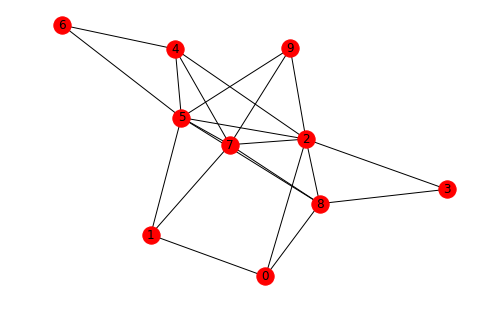

In [56]:
g=nx.gnp_random_graph(10, 0.5)
nx.draw(g, with_labels=True)

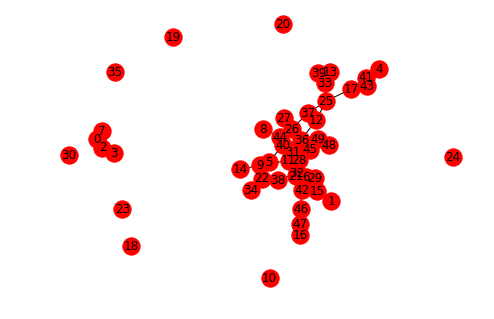

In [63]:
g=nx.gnp_random_graph(50, 0.04)
nx.draw(g, with_labels=True)

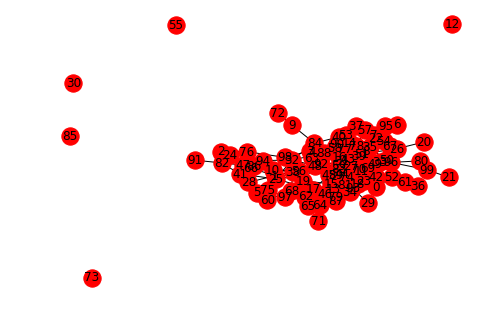

In [66]:
g=nx.gnp_random_graph(100, 0.03)
nx.draw(g, with_labels=True)

In [67]:
g.edges()

EdgeView([(0, 18), (0, 23), (0, 52), (0, 93), (1, 19), (1, 25), (1, 28), (1, 47), (1, 48), (1, 75), (2, 76), (2, 82), (3, 58), (3, 92), (3, 98), (4, 16), (5, 25), (5, 60), (6, 22), (7, 8), (7, 37), (7, 67), (8, 22), (8, 49), (8, 78), (8, 83), (9, 72), (9, 84), (10, 38), (10, 56), (10, 66), (11, 16), (11, 18), (11, 49), (11, 70), (13, 15), (13, 59), (13, 64), (13, 79), (13, 81), (14, 43), (15, 19), (15, 43), (15, 46), (15, 79), (15, 87), (15, 89), (16, 27), (16, 40), (16, 63), (16, 69), (17, 25), (17, 45), (17, 62), (17, 65), (17, 81), (17, 93), (17, 97), (18, 46), (18, 69), (19, 48), (19, 56), (19, 62), (20, 26), (21, 99), (22, 54), (22, 77), (23, 83), (24, 47), (24, 76), (25, 32), (25, 38), (25, 41), (26, 51), (26, 54), (26, 67), (26, 96), (27, 33), (27, 45), (27, 59), (29, 93), (31, 44), (31, 45), (31, 48), (31, 84), (31, 96), (32, 38), (32, 84), (32, 88), (32, 94), (33, 50), (33, 96), (34, 89), (35, 43), (35, 50), (35, 53), (35, 67), (36, 52), (37, 40), (38, 68), (38, 83), (38, 86),